In [1]:
import numpy as np
import pandas as pd

In [22]:
train_df=pd.read_csv("C:/Users/ritan/New folder/train1/train.csv",nrows=200000)
test_df=pd.read_csv("C:/Users/ritan/New folder/test (2)/test.csv")

In [23]:
print(train_df.shape)
print(test_df.shape)

(200000, 8)
(9914, 7)


In [24]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [26]:
train_df["pickup_datetime"]=pd.to_datetime(train_df['pickup_datetime'])

In [27]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


As this is Taxi fare data and we know there are many factors which affect the price of taxi like

1.Travelled distance.

2.Time of Travel

3.Demand and Availability of Taxi

4.Some special places are more costlier like Airport or other places where there might be toll


In [28]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


Here first thing which we can see is minimum value of fare is negative which is -62 which is not the valid value, so we need to remove the fare which are negative values. #Secondly, passenger_count minimum value is 0 and maximum value is 208 which impossible, so we need to remove them as well, for safer side we can think that a taxi can have maximum 7 people.

In [29]:
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [30]:
train_df.dropna(inplace=True)
print(train_df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

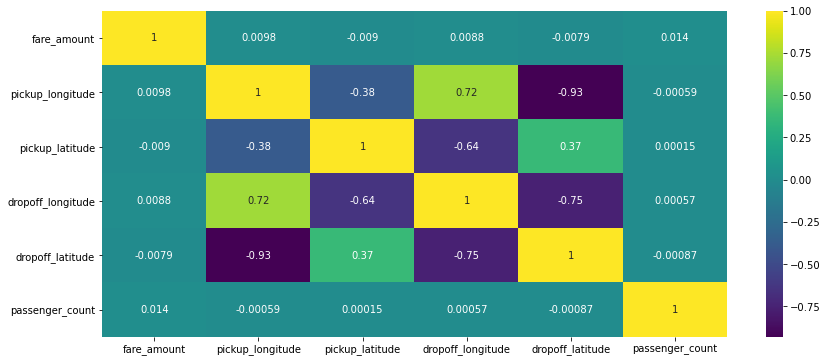

In [46]:
plt.figure(figsize=(14,6))
sns.heatmap(train_df.corr(), annot = True, cmap = 'viridis')

In [50]:
print("drop_off latitude min value",test_df["dropoff_latitude"].min())
print("drop_off latitude max value",test_df["dropoff_latitude"].max())
print("drop_off longitude min value", test_df["dropoff_longitude"].min())
print("drop_off longitude max value",test_df["dropoff_longitude"].max())
print("pickup latitude min value",test_df["pickup_latitude"].min())
print("pickup latitude max value",test_df["pickup_latitude"].max())
print("pickup longitude min value",test_df["pickup_longitude"].min())
print("pickup longitude max value",test_df["pickup_longitude"].max())

drop_off latitude min value 40.568973
drop_off latitude max value 41.696683
drop_off longitude min value -74.263242
drop_off longitude max value -72.990963
pickup latitude min value 40.573143
pickup latitude max value 41.709555
pickup longitude min value -74.252193
pickup longitude max value -72.986532


we can see what is range of latitude and longitude of our test dataset, lets keep the range same in our train set so that the useless data is removed 

In [51]:
min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532, 
max_latitude=41.709555

In [52]:
tempdf=train_df[(train_df["dropoff_latitude"]<min_latitude) | (train_df["pickup_latitude"]<min_latitude) | (train_df["dropoff_longitude"]<min_longitude) | (train_df["pickup_longitude"]<min_longitude) | (train_df["dropoff_latitude"]>max_latitude) | (train_df["pickup_latitude"]>max_latitude) | (train_df["dropoff_longitude"]>max_longitude) | (train_df["pickup_longitude"]>max_longitude) ]
print("before droping",train_df.shape)
train_df.drop(tempdf.index,inplace=True)
print("after droping",train_df.shape)

before droping (199999, 8)
after droping (195771, 8)


lets remove all those rows where fare amount is negative

In [53]:
print("before droping", train_df.shape)
train_df=train_df[train_df['fare_amount']>0]
print("after droping", train_df.shape)

before droping (195771, 8)
after droping (195755, 8)


On different day and time there would be different price like during eveing price would be more compare to afternoon, during christmas price would be different and similarly on weekends price would be different compare to week days. so lets create some extra features which will take care of all these things

In [54]:
import calendar
train_df['day']=train_df['pickup_datetime'].apply(lambda x:x.day)
train_df['hour']=train_df['pickup_datetime'].apply(lambda x:x.hour)
train_df['weekday']=train_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_df['month']=train_df['pickup_datetime'].apply(lambda x:x.month)
train_df['year']=train_df['pickup_datetime'].apply(lambda x:x.year)

In [55]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,Tuesday,3,2010


here we can see that week are in monday , tuesday and so on. So we need convert them in numerical

In [56]:
train_df.weekday = train_df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195755 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                195755 non-null  object             
 1   fare_amount        195755 non-null  float64            
 2   pickup_datetime    195755 non-null  datetime64[ns, UTC]
 3   pickup_longitude   195755 non-null  float64            
 4   pickup_latitude    195755 non-null  float64            
 5   dropoff_longitude  195755 non-null  float64            
 6   dropoff_latitude   195755 non-null  float64            
 7   passenger_count    195755 non-null  int64              
 8   day                195755 non-null  int64              
 9   hour               195755 non-null  int64              
 10  weekday            195755 non-null  int64              
 11  month              195755 non-null  int64              
 12  year               195755 non-

In [58]:
train_df=train_df[train_df['passenger_count']<=8]

In [59]:
train_df.drop(["key","pickup_datetime"], axis=1, inplace=True)

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195755 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        195755 non-null  float64
 1   pickup_longitude   195755 non-null  float64
 2   pickup_latitude    195755 non-null  float64
 3   dropoff_longitude  195755 non-null  float64
 4   dropoff_latitude   195755 non-null  float64
 5   passenger_count    195755 non-null  int64  
 6   day                195755 non-null  int64  
 7   hour               195755 non-null  int64  
 8   weekday            195755 non-null  int64  
 9   month              195755 non-null  int64  
 10  year               195755 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 17.9 MB


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x=train_df.drop("fare_amount", axis=1)
y=train_df['fare_amount']

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [64]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
131647,-73.997383,40.729007,-73.988172,40.737558,1,6,9,2,10,2009
60720,-73.985420,40.723583,-73.973198,40.762245,1,28,5,4,5,2015
52670,-73.969533,40.760567,-73.977077,40.747083,5,8,14,4,3,2012
69493,-73.973292,40.784818,-73.959017,40.783357,1,19,8,6,5,2012
6514,-73.912372,40.769097,-73.763295,40.761210,1,3,4,6,12,2011


In [65]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
44350,-73.985633,40.747107,-73.985512,40.732589,4,21,0,5,2,2014
142254,-73.989513,40.690306,-73.923144,40.694356,1,27,11,6,8,2011
139212,-73.968597,40.762743,-73.976513,40.764305,1,5,11,4,5,2011
33672,-73.978027,40.751825,-73.979072,40.740152,1,19,17,4,9,2013
70465,-73.964485,40.764740,-73.959482,40.773370,2,22,12,5,7,2011


In [66]:
x_train.shape

(156604, 10)

In [67]:
x_test.shape

(39151, 10)

In [68]:
from sklearn.linear_model import LinearRegression

lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [71]:
predictedvalues = lrmodel.predict(x_test)
predictedvalues

array([12.18847041, 19.5777593 ,  9.73548578, ...,  8.03897736,
       10.47378657,  9.95603293])

In [72]:
from sklearn.ensemble import RandomForestRegressor

rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [73]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [81]:
#accuracy of random forest model
rfrmodel.score(x_test,y_test)

0.8258068190617638

In [82]:
#accuracy of linear regression model
lrmodel.score(x_test,y_test)

0.28938550940135965

In [ ]:
#RandomForest Regressor is giving good value, so we can use it as final model